<a href="https://colab.research.google.com/github/rerebebeccacca/20210723_food_identify_project/blob/main/010_%E8%B3%87%E6%96%99%E6%B8%85%E6%B4%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
開始前，必須先去下載 GCP 為我們搜集的Log
並把名字改為 downloaded-logs.csv
上傳到colab

'''

'\n開始前，必須先去下載 GCP 為我們搜集的Log\n並把名字改為 downloaded-logs.csv\n上傳到colab\n\n'

In [ ]:
'''
讀取csv

python read csv
https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/
'''
import pandas as pd 
data = pd.read_csv("downloaded-logs.csv") 
data

FileNotFoundError: ignored

In [ ]:
'''
抓出指定欄位 - jsonPayload.message

'''
a = data['jsonPayload.message']

In [ ]:
print(a[10])

In [ ]:
'''
將jsonPayload.message 的欄位內容 轉成csv

欄位若無值，則不填

'''
import json
json_data_list = []


df_message = pd.DataFrame(columns=['userId', 'timestamp', 'event_type','message_type','message_id', 'message_text'])

for row in  data['jsonPayload.message']:
  try:
    events = json.loads(row).get('events')[0]
    print(json.loads(row).get('events')[0])
    # json_data_list.append()
    # print(line_event.get('type'))
    # print(line_event.get('message'))
    # print(line_event.get('message').get('id'))
    # print(line_event.get('timestamp'))
    # print(line_event.get('source').get('userId'))
    if events.get('type') not in ['follow','unfollow','postback']:
      df_message = df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type'),
            'message_type': events.get('message').get('type'),
            'message_id': events.get('message').get('id'),
            'message_text': events.get('message').get('text')
          },
          ignore_index=True)
    elif events.get('type')  in ['postback']:
      df_message =df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type'),
            'message_text': events.get('postback').get('data')
          },
          ignore_index=True
      )
    else:
      df_message = df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type')
          },
          ignore_index=True)
  except:
    pass

df_message

In [ ]:
# 安裝line 套件
!pip install line-bot-sdk

In [ ]:
'''

設置Line Bot Api 的 Channel access token

'''

from linebot import (
    LineBotApi, WebhookHandler
)

line_bot_api = LineBotApi('iRuogYf3cHsttNKwqUwl0phQV4fNuhmRPyVenE5DB5ArJHSLH/jYuJr31y7+DgGWRZJUSzr5i8NsvbKUcy7Xb9Akxys5GWdqm2bRcsbr/s03t4mpBO9UDnGcQG+BYHsxBFC6y36okKYWUg1qakCVSwdB04t89/1O/w1cDnyilFU=')

In [ ]:
'''
取出用戶id，向Line要個資
整理成一份用戶個資名單
'''


user_info_df= pd.DataFrame(columns=['userId', 'display_name', 'picture_url','status_message'])

for user_id in df_message['userId'].unique():
  try:
    line_user_profile = line_bot_api.get_profile(user_id)
    
    user_info_df = user_info_df.append(
        {
          'display_name': line_user_profile.display_name, 
          'userId': line_user_profile.user_id, 
          'picture_url': line_user_profile.picture_url,
          'status_message': line_user_profile.status_message
        },
        ignore_index=True)
  except:
    pass

user_info_df

In [ ]:
'''

將用戶個資名單跟 jsonPayload的欄位內容 整理在一份csv

'''
merge_data = pd.merge(df_message, user_info_df)
merge_data

In [ ]:
'''
timestamp 轉換成人類可懂的時間
'''

import datetime
human_use_date=[]
for stamp in merge_data['timestamp']:
  
  timestamp = datetime.datetime.fromtimestamp(
      stamp/1000+8*3600
      )
  human_use_date.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
  

merge_data['human_date']=human_use_date
merge_data

In [ ]:
print(merge_data['message_text'])

In [ ]:
b = merge_data['message_text']
text = list(b)
text

In [ ]:
'''
將資料存成csv
'''
merge_data.to_csv("final_data.csv")

In [ ]:
'''

進行可視化

外國人不考慮中文，中文會是亂碼

'''



In [ ]:
'''
看看誰發的話多
'''

merge_data['userId'].value_counts().sort_index().plot.bar()
# merge_data['timestamp'].plot.hist()

In [ ]:
'''
看看都發哪一類型的消息
'''
merge_data['message_type'].value_counts().sort_index().plot.bar()

In [ ]:
import pandas as pd 
data2 = pd.read_csv("final_data.csv") 
data2["human_date"]

0       2021-08-05 21:21:58
1       2021-08-05 21:21:45
2       2021-08-05 21:21:24
3       2021-08-04 16:23:01
4       2021-08-04 16:23:00
               ...         
4518    2021-08-02 16:28:25
4519    2021-08-02 16:28:08
4520    2021-08-02 16:28:00
4521    2021-08-02 16:21:58
4522    2021-08-02 16:21:36
Name: human_date, Length: 4523, dtype: object

In [ ]:
human_date = data2["human_date"]
human_date
print(type(human_date))

<class 'pandas.core.series.Series'>


In [ ]:
list = list(human_date)
list

['2021-08-05 21:21:58',
 '2021-08-05 21:21:45',
 '2021-08-05 21:21:24',
 '2021-08-04 16:23:01',
 '2021-08-04 16:23:00',
 '2021-08-04 16:22:42',
 '2021-08-04 16:22:22',
 '2021-08-05 21:20:55',
 '2021-08-05 21:18:21',
 '2021-08-05 21:18:12',
 '2021-08-05 21:18:08',
 '2021-08-05 21:17:32',
 '2021-08-05 21:17:02',
 '2021-08-05 10:33:27',
 '2021-08-05 10:33:13',
 '2021-08-05 10:33:11',
 '2021-08-05 10:33:01',
 '2021-08-05 10:31:41',
 '2021-08-05 10:31:25',
 '2021-08-05 01:11:35',
 '2021-08-05 01:11:32',
 '2021-08-05 01:08:06',
 '2021-08-05 01:06:57',
 '2021-08-05 01:06:32',
 '2021-08-05 01:02:55',
 '2021-08-05 01:02:49',
 '2021-08-05 01:02:46',
 '2021-08-05 01:02:34',
 '2021-08-05 01:02:08',
 '2021-08-05 01:01:46',
 '2021-08-05 01:00:51',
 '2021-08-05 01:00:40',
 '2021-08-05 01:00:20',
 '2021-08-05 00:59:34',
 '2021-08-05 00:58:55',
 '2021-08-04 19:59:15',
 '2021-08-04 19:58:24',
 '2021-08-04 19:58:21',
 '2021-08-04 19:58:13',
 '2021-08-04 19:57:51',
 '2021-08-04 19:57:48',
 '2021-08-04 19:

In [ ]:
# date = 0
# a = []
# while date<31:
#   date=date+1
#   if date<10:
#     date=f"0{date}"
#   a.append(f"2021-08-{date}")
#   date = int(date)
# a

In [ ]:
L2 = []
date = ["2021-08-02","2021-08-03","2021-08-04","2021-08-05"]
L3 = []
L4 = []
L5 = []
for i in list:
  if i[9] == '2':
    L2.append(i[:10])
  elif i[9] == '3':
    L3.append(i[:10])
  elif i[9] == '4':
    L4.append(i[:10])
  elif i[9] == '5':
    L5.append(i[:10])
  else:
    pass
print(L2)

a = len(L2)
b = len(L3)
c = len(L4)
d = len(L5)
print(a,b,c,d)
Plt_list = []
Plt_list.append(a)
Plt_list.append(b)
Plt_list.append(c)
Plt_list.append(d)
print(Plt_list)

['2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021

In [ ]:
font = FontProperties(fname=r"CHILLER.TTF") 
plt.xlabel("日期", fontproperties = font) # 設置x軸名稱 plt.ylabel("熱量(大卡)", fontproperties = font ) # 設置y軸名稱

NameError: ignored

4
4


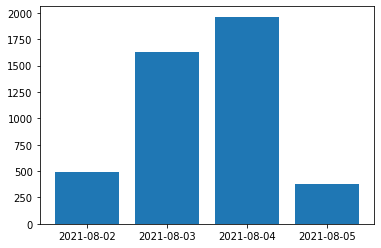

In [ ]:
#########每日消息量

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.bar(date, Plt_list) 
# font = FontProperties(fname=r"CHILLER.TTF") 
# plt.text(a, b+50, int(b), ha='center',fontsize=500)
# plt.xlabel("date", fontproperties = font,fontsize=20) # 設置x軸名稱 
# plt.ylabel("messages", fontproperties = font,fontsize=20 ) # 設置y軸名稱
print(len(date))
print(len(Plt_list))
plt.savefig('用戶流失圖.jpg')
plt.show()


In [ ]:
text = pd.read_csv("final_data.csv") 
text = text["message_text"]+text["display_name"]
text
text_list = []
for i in text:
  text_list.append(i)
text_list
sex_list_man = []
sex_list_woman = []
sex_list_man_height = []
sex_list_woman_height = []
age_list = []

for i in text_list:
  i = str(i)
  
  try:
    if '男' in i:
      if 'Ryan'not in i and '劉穎多' not in i and 'Ruby' not in i and '巫旻龍' not in i and 'Kurt Lee' not in i:
        sex_list_man.append(int(i[9:11]))
        sex_list_man_height.append(int(i[5:8]))
    if '女' in i:
      if 'Ryan'not in i and '劉穎多' not in i and 'Ruby' not in i and '巫旻龍' not in i and 'Kurt Lee' not in i:
        
        sex_list_woman.append(int(i[9:11]))
        sex_list_woman_height.append(int(i[5:8]))
    age_list.append(int(i[2:4]))
    
  except:
    pass
import statistics
print(sex_list_man)

for i in sex_list_man:
  i = str(i)
  try:
    if "Ryan" not in i:
      a.append(i)
  except:
    pass
mean_man = statistics.mean(sex_list_man)
mean_woman = statistics.mean(sex_list_woman)
mean_man_height = statistics.mean(sex_list_man_height)
mean_woman_height = statistics.mean(sex_list_woman_height)
mean_age_list = statistics.mean(age_list)
print(f"男平均體重:{mean_man}")
print(f"女平均體重:{mean_woman}")
print(f"男平均身高:{mean_man_height}")
print(f"女平均身高:{mean_woman_height}")
print(f"人數男:{len(sex_list_man_height)}")
print(f"人數女:{len(sex_list_woman_height)}")
print(f"總人數:{len(sex_list_man_height)+len(sex_list_woman_height)}")
print(f"用戶平均年紀:{mean_age_list}")
# sex_list_woman  
  

[73, 75, 74, 83, 60, 65, 65, 65, 60, 60, 60, 76, 76, 69, 64, 72, 63, 73, 67, 12, 61, 60, 73, 70, 70, 87, 87, 88]
男平均體重:68.14285714285714
女平均體重:55.2972972972973
男平均身高:172.39285714285714
女平均身高:159.6216216216216
人數男:28
人數女:37
總人數:65
用戶平均年紀:28.13605442176871


In [ ]:
data = pd.read_csv("final_data.csv")
list = list(data["userId"])
list



TypeError: ignored

In [ ]:
len("U69b5bef808bc39b5bb76b7d5e17b7a82")

33

In [ ]:
data = pd.read_csv("final_data.csv")
data = data["userId"]+data["message_text"]
data_list = []
for i in data:
  data_list.append(i)
data_list

['U92ed6326d9715bd4e85c0755c81c8b98活動量?',
 'U92ed6326d9715bd4e85c0755c81c8b98男/34/173/73',
 'U92ed6326d9715bd4e85c0755c81c8b98L',
 'U92ed6326d9715bd4e85c0755c81c8b982e32e32e3e32e',
 'U92ed6326d9715bd4e85c0755c81c8b98wedewdewdwed21e',
 'U92ed6326d9715bd4e85c0755c81c8b98!!@E#@E@E#R@#',
 nan,
 nan,
 'U905e11111cd2f77511ea3255dd14cf70@炸雞',
 'U905e11111cd2f77511ea3255dd14cf70nono',
 'U905e11111cd2f77511ea3255dd14cf70nono',
 nan,
 'U905e11111cd2f77511ea3255dd14cf70我要記錄!',
 'U905e11111cd2f77511ea3255dd14cf70lunch',
 'U905e11111cd2f77511ea3255dd14cf701fan',
 'U905e11111cd2f77511ea3255dd14cf70yesyes',
 nan,
 nan,
 'U905e11111cd2f77511ea3255dd14cf70我要記錄!',
 'U905e11111cd2f77511ea3255dd14cf70查看剩餘熱量',
 'U905e11111cd2f77511ea3255dd14cf70我要查看!',
 nan,
 nan,
 'U905e11111cd2f77511ea3255dd14cf70我要記錄!',
 'U905e11111cd2f77511ea3255dd14cf70breakfast',
 'U905e11111cd2f77511ea3255dd14cf701fan',
 'U905e11111cd2f77511ea3255dd14cf70@米漢堡',
 'U905e11111cd2f77511ea3255dd14cf70nono',
 nan,
 'U905e11111cd2f77511ea3

In [ ]:
import pandas as pd

df = pd.read_csv("final_data.csv")
data = df["userId"]+df["message_text"]
data_list = []
age_list = []
not_copy = []
for i in data:
  data_list.append(i)
print(data_list)
userId = list(df["userId"])
print(userId)
for i in data_list:
  try:
    if '男' in i:
      age_list.append(i)
  except:
    pass
for i in age_list:
  for j in userId:
    if j in not_copy:
      pass
    not_copy.append(i)
print(age_list)
print(len(age_list))
print(not_copy)
print(len(not_copy))


# for i in sex_list_man:
#   i = str(i)
#   try:
#     if "Ryan" not in i:
#       a.append(i)
#   except:
#     pass
# mean_man = statistics.mean(sex_list_man)
# mean_woman = statistics.mean(sex_list_woman)
# mean_man_height = statistics.mean(sex_list_man_height)
# mean_woman_height = statistics.mean(sex_list_woman_height)
# mean_age_list = statistics.mean(age_list)

['U92ed6326d9715bd4e85c0755c81c8b98活動量?', 'U92ed6326d9715bd4e85c0755c81c8b98男/34/173/73', 'U92ed6326d9715bd4e85c0755c81c8b98L', 'U92ed6326d9715bd4e85c0755c81c8b982e32e32e3e32e', 'U92ed6326d9715bd4e85c0755c81c8b98wedewdewdwed21e', 'U92ed6326d9715bd4e85c0755c81c8b98!!@E#@E@E#R@#', nan, nan, 'U905e11111cd2f77511ea3255dd14cf70@炸雞', 'U905e11111cd2f77511ea3255dd14cf70nono', 'U905e11111cd2f77511ea3255dd14cf70nono', nan, 'U905e11111cd2f77511ea3255dd14cf70我要記錄!', 'U905e11111cd2f77511ea3255dd14cf70lunch', 'U905e11111cd2f77511ea3255dd14cf701fan', 'U905e11111cd2f77511ea3255dd14cf70yesyes', nan, nan, 'U905e11111cd2f77511ea3255dd14cf70我要記錄!', 'U905e11111cd2f77511ea3255dd14cf70查看剩餘熱量', 'U905e11111cd2f77511ea3255dd14cf70我要查看!', nan, nan, 'U905e11111cd2f77511ea3255dd14cf70我要記錄!', 'U905e11111cd2f77511ea3255dd14cf70breakfast', 'U905e11111cd2f77511ea3255dd14cf701fan', 'U905e11111cd2f77511ea3255dd14cf70@米漢堡', 'U905e11111cd2f77511ea3255dd14cf70nono', nan, 'U905e11111cd2f77511ea3255dd14cf70我要記錄!', 'U905e1111

KeyboardInterrupt: ignored

In [ ]:
print(age_list)
locals()["未滿18"] = [i for i in age_list if int(i)<18]
locals()["b"] = [i for i in age_list if int(i)>18 and int(i)<30]
locals()["c"] = [i for i in age_list if int(i)>29 and int(i)<41]
locals()["d"] = [i for i in age_list if int(i)>40]
print(f"未滿18歲:{len(未滿18)-1}")
print(f"18~29歲:{len(b)}")
print(f"30~40歲:{len(c)}")
print(f"大於40歲:{len(d)}")








[34, 32, 25, 0, 40, 40, 40, 27, 29, 28, 28, 28, 66, 30, 30, 30, 30, 30, 30, 30, 28, 28, 28, 28, 28, 29, 29, 28, 28, 28, 28, 27, 26, 26, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 26, 28, 29, 30, 23, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 25, 25, 25, 25, 22, 23, 22, 21, 21, 26, 26, 30, 26, 26, 26, 26, 29, 33, 37, 29, 29, 29, 24, 24, 30, 29, 30, 39, 25, 29, 28, 25, 25, 22, 31, 31, 35, 34, 29, 23, 24, 29, 26, 22, 29, 30, 30, 30, 30, 30, 20, 29, 26, 31, 27, 32, 28, 25, 26, 26, 25, 33, 28, 20, 29, 30, 50, 28, 28, 28, 28, 28, 28, 28, 15, 28, 35, 35, 35, 35, 35, 35, 35, 35]
未滿18歲:1
18~29歲:103
30~40歲:40
大於40歲:2


In [ ]:
#抓取Postback
import pandas as pd
df_postback = pd.read_csv("final_data.csv") 
df_postback = df_postback["message_text"]
df_postback
locals()["manyyes"] = [i for i in df_postback if i == "manyyes"]
print(f"多類別正確次數:{len(manyyes)}")
locals()["yesyes"] = [i for i in df_postback if i == "yesyes"]
print(f"單類別正確次數:{len(yesyes)}")
locals()["nono"] = [i for i in df_postback if i == "nono"]
print(f"單類別錯誤次數:{len(nono)}")
locals()["manyno"] = [i for i in df_postback if i == "manyno"]
print(f"多類別錯誤次數:{len(manyno)}")
locals()["manysomeyes"] = [i for i in df_postback if i == "manysomeyes"]
print(f"多類別正確但有遺漏次數(有辨識出多項類別):{len(manysomeyes)}")
locals()["oneyes"] = [i for i in df_postback if i == "oneyes"]
print(f"多類別正確但有遺漏次數(只辨識出一項類別):{len(oneyes)}")
print(f"正確次數:{len(manyyes+yesyes)}")
print(f"錯誤次數:{len(nono+manyno)}")
print(f"正確但有遺漏次數:{len(oneyes+manysomeyes)}")


多類別正確次數:105
單類別正確次數:99
單類別錯誤次數:51
多類別錯誤次數:8
多類別正確但有遺漏次數(有辨識出多項類別):23
多類別正確但有遺漏次數(只辨識出一項類別):12
正確次數:204
錯誤次數:59
正確但有遺漏次數:35


In [ ]:
total = 
import matplotlib.pyplot as plt
plt.pie(,labels=revenue.index,
autopct='%.0f%%',radius=1,explode=None,shadow=True)